In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("datasets\salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
inputs = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']

In [5]:
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [6]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [8]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [9]:
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [10]:
inputs_n = inputs.drop(['company','job','degree'], axis='columns')
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2)

In [15]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
model.score(X_test, y_test)

0.5

In [23]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_predicted)
confusion_matrix

array([[1, 2],
       [0, 1]], dtype=int64)

Text(69.0, 0.5, 'Truth')

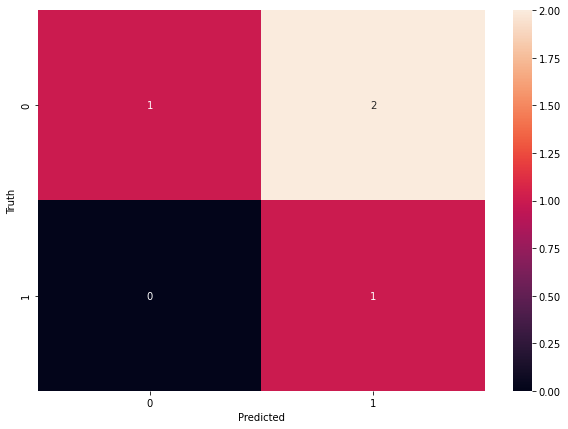

In [26]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?

In [27]:
model.predict([[2,1,0]])

array([1], dtype=int64)

Is salary of Google, Computer Engineer, Masters degree > 100 k ?

In [28]:
model.predict([[2,1,1]])

array([1], dtype=int64)